# Finding the Mass-Metallicity Relation

In [113]:
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

import sys

## Import Data

In [2]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [3]:
results_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/results'

In [4]:
big_dat_fold = 'E:/temporary-cosmos-big-data'

In [41]:
with fits.open(f'{big_dat_fold}/COSMOS2020_CLASSIC_R1_v2.1_p3.fits.gz') as hdul:
    cosmos_2020 = hdul[1].data
    cosmos_2020_header = hdul[1].header

In [42]:
init_dict = {'ez_LOIII_1' : None, 'ez_LOII_1': None, 'ez_LHb_1' : None, 'ez_LOIII_2': None, 'ez_LOII_2' : None, 'ez_LHb_2' : None}

In [43]:
def convert_results(id_1_2020,id_2_2020, data, empty_dict):    
    ## Initialise dictionary
    export_dict = empty_dict.copy()
    
    wanted_keys = ['ez_LOIII', 'ez_LOII', 'ez_LHb']
    
    data_column = data[data['ID'] == int(id_1_2020)]
    
    ## Add all values
    for i in wanted_keys:
        if len(data_column) > 0.5:
            export_dict[f'{i}_1'] = data_column[f'{i}'][0]
        else:
            export_dict[f'{i}_1'] = np.nan
        
    
    data_column = data[data['ID'] == int(id_2_2020)]
    
    ## Assign values for secondary.
    for i in wanted_keys:
        if len(data_column) > 0.5:
            export_dict[f'{i}_2'] = data_column[f'{i}'][0]
        else:
            export_dict[f'{i}_2'] = np.nan
        
    clear_output(wait = True)
    
    return export_dict

In [44]:
df = pd.read_csv(f'{data_folder}/cosmos-matched-all-eazy-df.csv', index_col = 0).query('id_1_2020 != "failed"')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (466) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
df_tmp = df.query('id_2_2020 != "failed"')

In [46]:
df

,SourceID,id_1_2020,id_2_2020,ez_LIR_1,ez_L2800_1,ez_LIR_2,ez_L2800_2,ra_1,dec_1,clon_1,...,ssfr_med_2,ssfr_med_min68_2,ssfr_med_max68_2,ssfr_best_2,l_nu_2,l_r_2,l_k_2,dist_2,angle_2,category
0,4000705532455,816891,812427,1.461746e+10,6.532970e+09,4.550346e+08,3.795326e+08,150.679866,2.196563,10h02m43.17s,...,-8.625,-8.745,-8.435,-8.666,27.074,27.260,27.124,9.361438,123.114321,NaN
1,4000705533312,873195,872551,3.561132e+10,1.346792e+09,1.310930e+11,5.523424e+09,150.668120,2.242867,10h02m40.35s,...,-10.300,-10.368,-10.231,-10.258,28.661,29.620,29.874,2.627196,14.847254,stage3
2,4000705533383,861738,861742,5.621026e+09,5.348111e+09,2.269957e+10,2.636891e+09,150.645145,2.237538,10h02m34.83s,...,-8.440,-8.550,-8.334,-8.448,29.135,29.232,29.068,2.241379,287.399545,stage1
3,4000705539529,1284864,1281998,4.125722e+10,1.431745e+10,5.301575e+08,2.605845e+09,149.686238,2.637428,09h58m44.70s,...,-8.863,-8.987,-8.724,-8.830,28.323,28.572,28.466,3.301196,89.699137,stage1
4,4000705539941,1301188,1300267,5.449620e+07,3.591865e+08,1.352380e+09,3.631612e+08,149.702477,2.654904,09h58m48.59s,...,-8.270,-8.574,-8.054,-8.240,27.618,27.623,27.561,5.171943,338.551088,stage2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,6000536184828,1258774,1251929,1.478491e+11,1.198529e+10,NaN,NaN,150.481102,2.605657,10h01m55.46s,...,-8.641,-9.158,-8.196,-8.543,27.540,27.664,27.613,7.638679,9.844286,stage4
2459,6000536185304,1298440,1294806,1.230318e+11,6.801087e+09,2.763437e+09,4.709840e+09,150.471787,2.648527,10h01m53.23s,...,-8.614,-8.746,-8.424,-8.746,28.699,28.908,28.796,9.098925,95.953708,stage4
2460,6000536185496,1308675,1308556,3.568900e+10,7.501403e+09,5.335385e+08,7.185492e+07,150.501189,2.663116,10h02m00.29s,...,-8.471,-8.823,-8.062,-8.550,27.942,28.083,27.930,9.743745,314.274351,stage1
2461,6000536185585,1317966,1315791,6.913122e+10,1.568826e+10,1.170207e+09,7.337763e+07,150.487626,2.671314,10h01m57.03s,...,-8.632,-9.201,-8.099,-8.272,27.326,27.343,27.281,2.636796,240.396443,stage3


In [51]:
df_red = (
    df_tmp[['SourceID', 'id_1_2020', 'id_2_2020']]
    .assign(id_1_2020_int = df_tmp.id_1_2020.apply(lambda x: int(x)))
    .assign(id_2_2020_int = df_tmp.id_2_2020.apply(lambda x: int(x)))
    .drop(columns = ['id_1_2020', 'id_2_2020'])
    .rename(columns = {'id_1_2020_int' : 'id_1_2020', 'id_2_2020_int' : 'id_2_2020'})
)

In [54]:
df_red

,SourceID,id_1_2020,id_2_2020
0,4000705532455,816891,812427
1,4000705533312,873195,872551
2,4000705533383,861738,861742
3,4000705539529,1284864,1281998
4,4000705539941,1301188,1300267
...,...,...,...
2458,6000536184828,1258774,1251929
2459,6000536185304,1298440,1294806
2460,6000536185496,1308675,1308556
2461,6000536185585,1317966,1315791


In [55]:
del df_tmp, df

In [56]:
init_dict = {'ez_LOIII_1' : None, 'ez_LOII_1': None, 'ez_LHb_1' : None, 'ez_LOIII_2': None, 'ez_LOII_2' : None, 'ez_LHb_2' : None}

In [57]:
ids_2020_dict_use = df_red.set_index('SourceID').to_dict(orient = 'index')

In [59]:
dict_results = {}

In [61]:
dict_results = {key : convert_results(ids_2020_dict_use[key]['id_1_2020'], ids_2020_dict_use[key]['id_2_2020'], cosmos_2020, init_dict) for key in tqdm(list(ids_2020_dict_use.keys()))}


100%|██████████| 2335/2335 [39:40<00:00,  1.02s/it]


In [62]:
df_lums = pd.DataFrame.from_dict(dict_results, orient = 'index').reset_index().rename(columns = {'index' : 'SourceID'})

In [63]:
df_lums

,SourceID,ez_LOIII_1,ez_LOII_1,ez_LHb_1,ez_LOIII_2,ez_LOII_2,ez_LHb_2
0,4000705532455,3.968023e+07,7.122776e+07,3.529942e+07,2.643634e+06,4.859232e+06,2.353145e+06
1,4000705533312,6.443518e+06,8.161661e+06,5.706386e+06,4.649864e+07,5.296161e+07,4.072427e+07
2,4000705533383,3.420479e+07,6.159652e+07,3.040232e+07,2.469285e+07,3.531095e+07,1.987356e+07
3,4000705539529,9.945875e+07,1.509603e+08,8.101761e+07,1.407195e+07,2.515467e+07,1.164772e+07
4,4000705539941,1.717745e+06,3.164775e+06,1.572096e+06,2.357451e+06,4.181649e+06,2.092185e+06
...,...,...,...,...,...,...,...
2330,6000536184828,8.414724e+07,1.228697e+08,7.341029e+07,NaN,NaN,NaN
2331,6000536185304,7.074681e+07,9.966082e+07,6.142548e+07,2.921893e+07,5.292893e+07,2.598810e+07
2332,6000536185496,5.817624e+07,8.908337e+07,4.727733e+07,7.310732e+05,1.173533e+06,6.589683e+05
2333,6000536185585,1.387691e+08,2.103253e+08,1.123967e+08,6.168115e+05,7.443178e+05,5.285979e+05


In [64]:
df_lums.to_csv(f'{data_folder}/eazy-line-lums-Z.csv')

In [ ]:
# df_lums = pd.read_csv(f'{data_folder}/eazy-line-lums-Z.csv', index_col = 0)

In [65]:
df_cat = pd.read_csv(f'{data_folder}/cosmos-matched-all-real-df.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (460) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
df_z = df_cat[['SourceID', 'photoz_1', 'photoz_2']]

In [67]:
df_lums.columns

Index(['SourceID', 'ez_LOIII_1', 'ez_LOII_1', 'ez_LHb_1', 'ez_LOIII_2',
       'ez_LOII_2', 'ez_LHb_2'],
      dtype='object')

In [80]:
df_merge = df_z.merge(df_lums, on ='SourceID', how='left').dropna()

In [81]:
df_merge

,SourceID,photoz_1,photoz_2,ez_LOIII_1,ez_LOII_1,ez_LHb_1,ez_LOIII_2,ez_LOII_2,ez_LHb_2
0,4000705532455,0.536,0.366,3.968023e+07,7.122776e+07,3.529942e+07,2.643634e+06,4.859232e+06,2.353145e+06
1,4000705533312,0.310,0.336,6.443518e+06,8.161661e+06,5.706386e+06,4.649864e+07,5.296161e+07,4.072427e+07
2,4000705533383,0.621,0.756,3.420479e+07,6.159652e+07,3.040232e+07,2.469285e+07,3.531095e+07,1.987356e+07
3,4000705539529,0.698,0.834,9.945875e+07,1.509603e+08,8.101761e+07,1.407195e+07,2.515467e+07,1.164772e+07
4,4000705539941,0.237,0.372,1.717745e+06,3.164775e+06,1.572096e+06,2.357451e+06,4.181649e+06,2.092185e+06
...,...,...,...,...,...,...,...,...,...
2457,6000536184720,0.819,0.865,2.447966e+08,3.661013e+08,1.980545e+08,3.221266e+07,4.651765e+07,2.626638e+07
2459,6000536185304,0.538,0.480,7.074681e+07,9.966082e+07,6.142548e+07,2.921893e+07,5.292893e+07,2.598810e+07
2460,6000536185496,0.868,0.992,5.817624e+07,8.908337e+07,4.727733e+07,7.310732e+05,1.173533e+06,6.589683e+05
2461,6000536185585,0.636,0.579,1.387691e+08,2.103253e+08,1.123967e+08,6.168115e+05,7.443178e+05,5.285979e+05


In [82]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

In [93]:
l_sun = 3.827e26 * u.W

In [94]:
df_l_dist = (
    df_merge
    .assign(ld_1 = df_merge.photoz_1.apply(lambda x: cosmo.luminosity_distance(x).to(u.m)))
    .assign(ld_2 = df_merge.photoz_2.apply(lambda x: cosmo.luminosity_distance(x).to(u.m)))
    .assign(ez_LOIII_1_wm = df_merge.ez_LOIII_1.apply(lambda x: x * l_sun))
    .assign(ez_LOII_1_wm = df_merge.ez_LOII_1.apply(lambda x: x * l_sun))
    .assign(ez_LHb_1_wm = df_merge.ez_LHb_1.apply(lambda x: x * l_sun))
    .assign(ez_LOIII_2_wm = df_merge.ez_LOIII_1.apply(lambda x: x * l_sun))
    .assign(ez_LOII_2_wm = df_merge.ez_LOII_1.apply(lambda x: x * l_sun))
    .assign(ez_LHb_2_wm = df_merge.ez_LHb_2.apply(lambda x: x * l_sun))
)

In [95]:
df_flux = (
    df_l_dist
    .assign(ez_LOIII_flux_1 = df_l_dist.apply(lambda row: row.ez_LOIII_1_wm / (4 * np.pi * (row.ld_1 ** 2)), axis = 1))
    .assign(ez_LOII_flux_1 = df_l_dist.apply(lambda row: row.ez_LOII_1_wm / (4 * np.pi * (row.ld_1 ** 2)), axis = 1))
    .assign(ez_LHb_flux_1 = df_l_dist.apply(lambda row: row.ez_LHb_1_wm / (4 * np.pi * (row.ld_1 ** 2)), axis = 1))
    .assign(ez_LOIII_flux_2 = df_l_dist.apply(lambda row: row.ez_LOIII_2_wm / (4 * np.pi * (row.ld_2 ** 2)), axis = 1))
    .assign(ez_LOII_flux_2 = df_l_dist.apply(lambda row: row.ez_LOII_2_wm / (4 * np.pi * (row.ld_2 ** 2)), axis = 1))
    .assign(ez_LHb_flux_2 = df_l_dist.apply(lambda row: row.ez_LHb_2_wm / (4 * np.pi * (row.ld_2 ** 2)), axis = 1))
)

In [97]:
df_flux_red = df_flux[['SourceID', 'ez_LOIII_flux_1', 'ez_LOII_flux_1', 'ez_LHb_flux_1', 'ez_LOIII_flux_2', 'ez_LOII_flux_2', 'ez_LHb_flux_2']]

In [99]:
df_metals = (
    df_flux_red
    .assign(Z_1 = df_flux_red.apply(lambda row: (np.log10(row.ez_LOIII_flux_1 * (u.m**2 / u.W)) + np.log10(row.ez_LOII_flux_1 * (u.m**2 / u.W))) / np.log10(row.ez_LHb_flux_1 * (u.m**2 / u.W)), axis = 1))
    .assign(Z_2 = df_flux_red.apply(lambda row: (np.log10(row.ez_LOIII_flux_2 * (u.m**2 / u.W)) + np.log10(row.ez_LOII_flux_2 * (u.m**2 / u.W))) / np.log10(row.ez_LHb_flux_2 * (u.m**2 / u.W)), axis = 1))
)
df_metals

,SourceID,ez_LOIII_flux_1,ez_LOII_flux_1,ez_LHb_flux_1,ez_LOIII_flux_2,ez_LOII_flux_2,ez_LHb_flux_2,Z_1,Z_2
0,4000705532455,1.3380395800762276e-19 W / m2,2.4018396865533944e-19 W / m2,1.190316006677262e-19 W / m2,3.315299702431865e-19 W / m2,5.951108260688278e-19 W / m2,1.9660621003946347e-20 W / m2,1.9812047092746738,1.8625864794046534
1,4000705533312,7.925284877466814e-20 W / m2,1.0038535661954615e-19 W / m2,7.01864058778842e-20 W / m2,6.574214555827691e-20 W / m2,8.327206944403461e-20 W / m2,4.1550294042617946e-19 W / m2,1.98913114800961,2.0815391025734935
2,4000705533383,8.075874892659009e-20 W / m2,1.454316270333578e-19 W / m2,7.178097265678039e-20 W / m2,4.9938000643721554e-20 W / m2,8.992913809265401e-20 W / m2,2.901482543750923e-20 W / m2,1.9813085069929417,1.962784587487031
3,4000705539529,1.765746601246388e-19 W / m2,2.680083043240722e-19 W / m2,1.4383506538695289e-19 W / m2,1.1406241010638902e-19 W / m2,1.7312604820052898e-19 W / m2,1.3357975062620088e-20 W / m2,1.9809285372670444,1.8971522075470875
4,4000705539941,3.905416326365444e-20 W / m2,7.19534206292194e-20 W / m2,3.5742720731520166e-20 W / m2,1.3814720961735283e-20 W / m2,2.545225259403034e-20 W / m2,1.682609992437699e-20 W / m2,1.982395903260073,1.9952411583038179
...,...,...,...,...,...,...,...,...,...
2457,6000536184720,2.935688455611434e-19 W / m2,4.3904176801075235e-19 W / m2,2.3751401966649245e-19 W / m2,2.5659749347408967e-19 W / m2,3.8374990706746523e-19 W / m2,2.7532592525965786e-20 W / m2,1.9807328545447949,1.8919432537222487
2459,6000536185304,2.3642979339534776e-19 W / m2,3.3305794903279067e-19 W / m2,2.0527868751112538e-19 W / m2,3.109564788658618e-19 W / m2,4.380434699121982e-19 W / m2,1.1422659916776564e-19 W / m2,1.9854698588485247,1.946221633957535
2460,6000536185496,6.046245893296658e-20 W / m2,9.258418330406501e-20 W / m2,4.9135242106162575e-20 W / m2,4.348118587640354e-20 W / m2,6.658131598521724e-20 W / m2,4.925159073100468e-22 W / m2,1.9810842694839457,1.808668404330529
2461,6000536185585,3.091527721492004e-19 W / m2,4.685671365687378e-19 W / m2,2.5039960956604267e-19 W / m2,3.8833520654728927e-19 W / m2,5.885799260207712e-19 W / m2,1.4792422842864685e-21 W / m2,1.9804488729939331,1.7590521815379663


In [105]:
df_metals_dna = df_metals.dropna()[['SourceID', 'Z_1', 'Z_2']]

In [108]:
df_masses = df_cat[['SourceID', 'mass_best_1', 'mass_best_2']]

In [109]:
df_mass_met = df_metals_dna.merge(df_masses, on = 'SourceID', how = 'left')

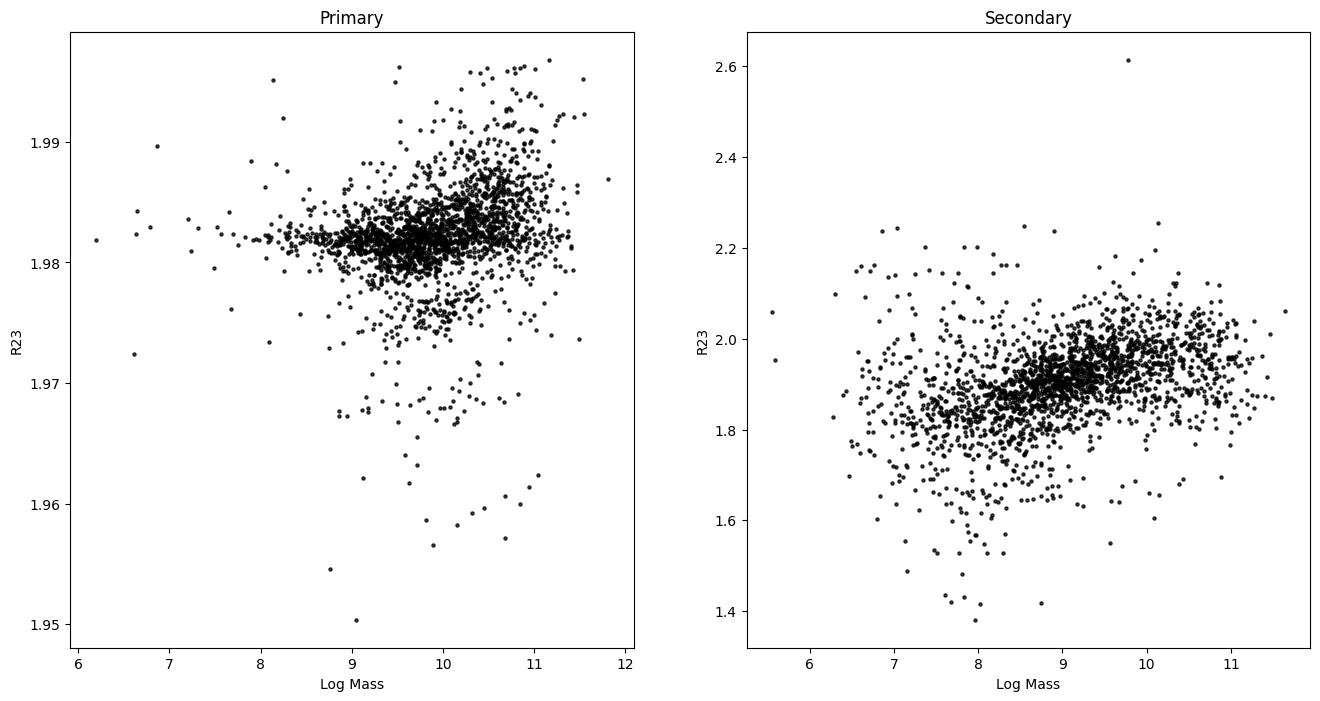

In [119]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
df_mass_met.plot.scatter(
    x = 'mass_best_1',
    y = 'Z_1',
    ax = ax[0],
    color = 'black',
    s = 5,
    alpha = 0.75,
    xlabel = 'Log Mass',
    ylabel = 'R23',
    title = 'Primary'
)

df_mass_met.plot.scatter(
    x = 'mass_best_2',
    y = 'Z_2',
    ax = ax[1],
    color = 'black',
    s = 5,
    alpha = 0.75,
    xlabel = 'Log Mass',
    ylabel = 'R23',
    title = 'Secondary'
)
plt.show()

In [120]:
df_log_mass_met = (
    df_mass_met
    .assign(log_z1 = df_mass_met.Z_1.apply(lambda x: np.log10(x)))
    .assign(log_z2 = df_mass_met.Z_2.apply(lambda x: np.log10(x)))
)

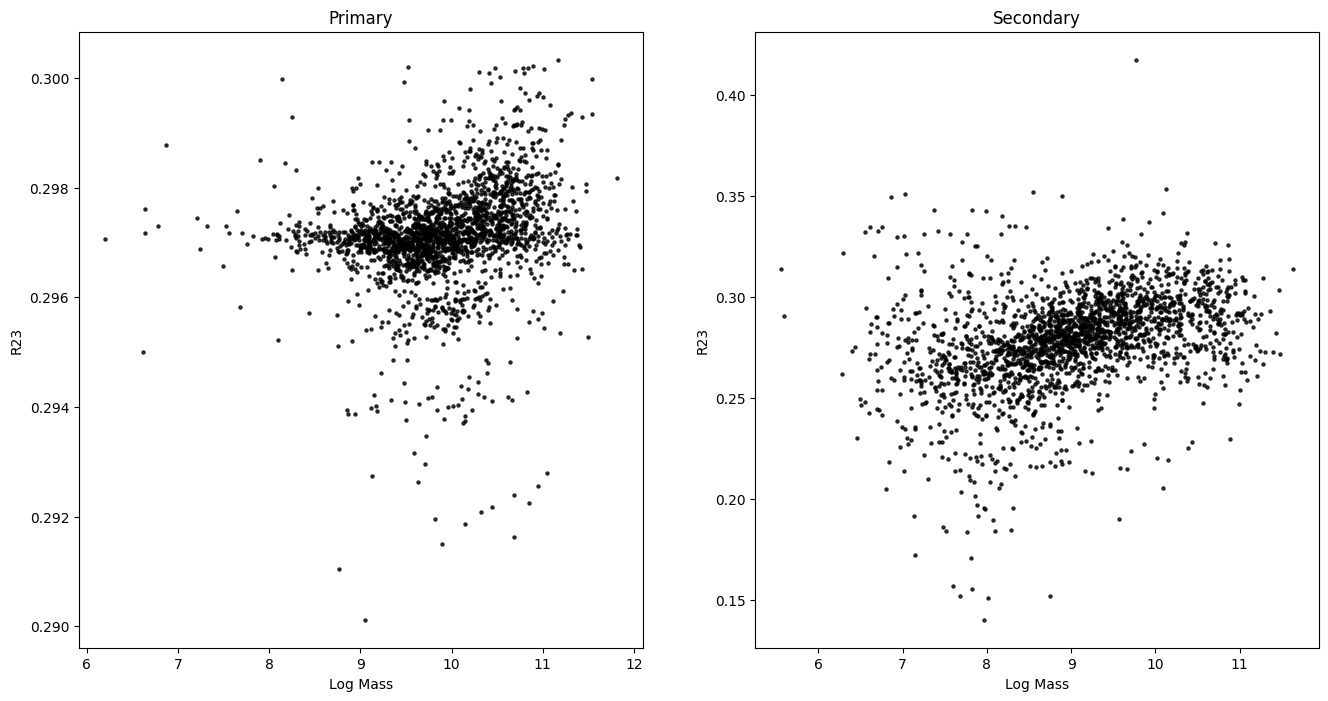

In [121]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
df_log_mass_met.plot.scatter(
    x = 'mass_best_1',
    y = 'log_z1',
    ax = ax[0],
    color = 'black',
    s = 5,
    alpha = 0.75,
    xlabel = 'Log Mass',
    ylabel = 'R23',
    title = 'Primary'
)

df_log_mass_met.plot.scatter(
    x = 'mass_best_2',
    y = 'log_z2',
    ax = ax[1],
    color = 'black',
    s = 5,
    alpha = 0.75,
    xlabel = 'Log Mass',
    ylabel = 'R23',
    title = 'Secondary'
)
plt.show()